In [1]:


import os
import csv
from datetime import datetime
import time
import re

In [2]:
from bs4 import BeautifulSoup
from lxml import html
from time import sleep
import requests
import regex

In [6]:
import pandas as pd
import numpy as np
import matplotlib as plt

In [4]:
df = pd.read_csv('../data/meta_scrape.csv')
weekdf = df.loc[df['user_num']!=0]

,date,year,week_num,album,artist,meta_score,user_score,img,crit_num,user_num,label,genre
4,"February 4, 2022",2022,5,Few Good Things,Saba,83,92,https://static.metacritic.com/images/products/...,9.0,14,Saba Pivot,Rap
8,"February 4, 2022",2022,5,Time Skiffs,Animal Collective,76,89,https://static.metacritic.com/images/products/...,23.0,20,Domino,Pop/Rock
9,"February 4, 2022",2022,5,Laurel Hell,Mitski,83,89,https://static.metacritic.com/images/products/...,26.0,36,Dead Oceans,Pop/Rock
10,"February 4, 2022",2022,5,Ants From Up There,Black Country New Road,92,96,https://static.metacritic.com/images/products/...,20.0,76,Ninja Tune,Pop/Rock
11,"February 4, 2022",2022,5,Pompeii,Cate Le Bon,85,88,https://static.metacritic.com/images/products/...,17.0,8,Mexican Summer,Pop/Rock
12,"February 4, 2022",2022,5,Requiem,Korn,85,79,https://static.metacritic.com/images/products/...,6.0,22,Loma Vista,Pop/Rock
13,"February 4, 2022",2022,5,Give Me the Future,Bastille,77,86,https://static.metacritic.com/images/products/...,7.0,15,EMI,Pop/Rock
16,"January 28, 2022",2022,4,Extreme Witchcraft,Eels,72,85,https://static.metacritic.com/images/products/...,13.0,4,E Works,Pop/Rock
24,"January 28, 2022",2022,4,Motordrome,M,68,87,https://static.metacritic.com/images/products/...,10.0,16,Sony,Electronic
25,"January 28, 2022",2022,4,Three Dimensions Deep,Amber Mark,76,89,https://static.metacritic.com/images/products/...,7.0,10,Interscope,R&B


In [10]:
# bin by scores

bins = [0, 69, 79, 89, 100]
group_names=['mixed', '70s', '80s', '90s']
df["score_groups"] = pd.cut(df["meta_score"], bins, labels=group_names, include_lowest=True)
df

,date,year,week_num,album,artist,meta_score,user_score,img,crit_num,user_num,label,genre,score_groups
0,"February 11, 2022",2022,6,Dragon New Warm Mountain I Believe in You,Big Thief,87,0,https://static.metacritic.com/images/products/...,10.0,0,4AD,Pop/Rock,80s
1,"February 11, 2022",2022,6,Lucifer on the Sofa,Spoon,86,0,https://static.metacritic.com/images/products/...,5.0,0,Matador,Pop/Rock,80s
2,"February 11, 2022",2022,6,Earthling,Eddie Vedder,82,0,https://static.metacritic.com/images/products/...,5.0,0,Republic,Pop/Rock,80s
3,"February 4, 2022",2022,5,Let the Festivities Begin!,Los Bitchos,74,0,https://static.metacritic.com/images/products/...,7.0,0,City Slang,Pop/Rock,70s
4,"February 4, 2022",2022,5,Few Good Things,Saba,83,92,https://static.metacritic.com/images/products/...,9.0,14,Saba Pivot,Rap,80s
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,"January 7, 2022",2022,1,Transparency,Twin Atlantic,66,50,https://static.metacritic.com/images/products/...,6.0,10,Believe,Pop/Rock,mixed
70,"January 7, 2022",2022,1,Dawn FM,The Weeknd,88,92,https://static.metacritic.com/images/products/...,24.0,832,Republic,Pop,80s
71,"January 7, 2022",2022,1,Now Or Whenever,Spector,72,71,https://static.metacritic.com/images/products/...,4.0,7,NaN,Pop/Rock,70s
72,"January 7, 2022",2022,1,DS4EVER,Gunna,51,53,https://static.metacritic.com/images/products/...,5.0,4,300 Entertainment,Rap,mixed


In [29]:
# groupby score count
week_df = df.loc[df['week_num']==5]
week_dict = week_df['score_groups'].value_counts().to_dict()
names = list(week_dict.keys)
names

TypeError: 'builtin_function_or_method' object is not iterable

In [ ]:
score_bin_df = pd.cut(np.array([1, 7, 5, 4, 6, 3]),
       3, labels=["bad", "medium", "good"])

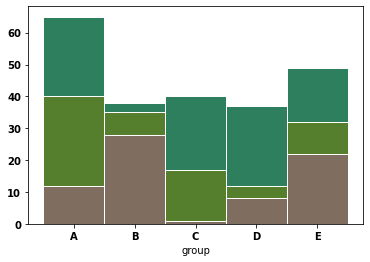

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import pandas as pd
 
# y-axis in bold
rc('font', weight='bold')
 
# Values of each group
bars1 = [12, 28, 1, 8, 22]
bars2 = [28, 7, 16, 4, 10]
bars3 = [25, 3, 23, 25, 17]
 
# Heights of bars1 + bars2
bars = np.add(bars1, bars2).tolist()
 
# The position of the bars on the x-axis
r = [0,1,2,3,4]
 
# Names of group and bar width
names = ['A','B','C','D','E']
barWidth = 1
 
# Create brown bars
plt.bar(r, bars1, color='#7f6d5f', edgecolor='white', width=barWidth)
# Create green bars (middle), on top of the first ones
plt.bar(r, bars2, bottom=bars1, color='#557f2d', edgecolor='white', width=barWidth)
# Create green bars (top)
plt.bar(r, bars3, bottom=bars, color='#2d7f5e', edgecolor='white', width=barWidth)
 
# Custom X axis
plt.xticks(r, names, fontweight='bold')
plt.xlabel("group")
 
# Show graphic
plt.show()

In [19]:
rev_test = ['https://www.metacritic.com/music/few-good-things/saba', 
'https://www.metacritic.com/music/time-skiffs/animal-collective',
'https://www.metacritic.com/music/laurel-hell/mitski',
'https://www.metacritic.com/music/ants-from-up-there/black-country-new-road',
'https://www.metacritic.com/music/pompeii/cate-le-bon',
'https://www.metacritic.com/music/requiem/korn',
'https://www.metacritic.com/music/give-me-the-future/bastille',
'https://www.metacritic.com/music/glitch-princess/yeule',
'https://www.metacritic.com/music/extreme-witchcraft/eels',
'https://www.metacritic.com/music/motordrome',
'https://www.metacritic.com/music/three-dimensions-deep/amber-mark',
'https://www.metacritic.com/music/the-overload/yard-act',
'https://www.metacritic.com/music/the-gods-we-can-touch/aurora']

In [20]:
from bs4 import BeautifulSoup
url = 'https://www.metacritic.com/music/glitch-princess/yeule'
part = url[26:]
print(part+'/user-reviews')
user_agent = {'User-agent': 'Mozilla/5.0'}
response_reviews = requests.get(url, headers = user_agent)
# scrape website into variable to parse
soup_reviews = BeautifulSoup(response_reviews.text, 'html.parser')
########### comment back in from here
# print(soup_reviews.find_all('a', href = part + '/user-reviews'))
user_num= soup_reviews.find_all('a', href=part + '/user-reviews')[2].text.split()[0]

print(user_num)

/music/glitch-princess/yeule/user-reviews
7


In [21]:
for rev in rev_test:
    url = rev
    part = url[26:]
    print(part+'/user-reviews')
    user_agent = {'User-agent': 'Mozilla/5.0'}
    response_reviews = requests.get(url, headers = user_agent)
    # scrape website into variable to parse
    soup_reviews = BeautifulSoup(response_reviews.text, 'html.parser')
    ########### comment back in from here
    # print(soup_reviews.find_all('a', href = part + '/user-reviews'))
    user_num= soup_reviews.find_all('a', href=part + '/user-reviews')[2].text.split()[0]

    print(user_num)

/music/few-good-things/saba/user-reviews
13
/music/time-skiffs/animal-collective/user-reviews
19
/music/laurel-hell/mitski/user-reviews
36
/music/ants-from-up-there/black-country-new-road/user-reviews
74
/music/pompeii/cate-le-bon/user-reviews
8
/music/requiem/korn/user-reviews
22
/music/give-me-the-future/bastille/user-reviews
14
/music/glitch-princess/yeule/user-reviews
7
/music/extreme-witchcraft/eels/user-reviews
4
/music/motordrome/user-reviews


IndexError: list index out of range

In [ ]:
baseurl = 'https://www.metacritic.com'
starturl = '/browse/albums/release-date/new-releases/date'
url = baseurl+starturl

user_agent = 'Mozilla/5.0 (X11; Linux x86_64; rv:68.0) Gecko/20100101 Firefox/68.0'
headers = {'User-Agent': user_agent}
response = requests.get(url, headers=headers)

page = html.fromstring(response.content)

# find this: <td class="clamp-summary-wrap">

artists    = [artist.strip()[3:] for artist in page.xpath('//td[@class="clamp-summary-wrap"]/div/div[@class="artist"]/text()')]
albumname  = page.xpath('//td[@class="clamp-summary-wrap"]/a/h3/text()')
links      = page.xpath('//td[@class="clamp-summary-wrap"]/a/@href')
dates      = page.xpath('//td[@class="clamp-summary-wrap"]/div/span/text()')
metascores = page.xpath('//td[@class="clamp-summary-wrap"]/div/div[@class="clamp-metascore"]/a/div/text()')
userscores = page.xpath('//td[@class="clamp-summary-wrap"]/div/div[@class="clamp-userscore"]/a/div/text()')

recordlabels = []
count = 0
for link in links:
    response = requests.get(baseurl+link, headers=headers)
    page = html.fromstring(response.content)

    recordlabel = page.xpath('//span[contains(@class,"label") and contains(text(),"Record Label")]/following-sibling::span/text()')

    sleep(1)

    count += 1
    time.sleep(3)
    print(count)


maybe = zip(artists, albumname, recordlabels, dates, metascores, userscores)

print(list(maybe))

In [ ]:
baseurl = 'https://www.metacritic.com'
starturl = '/browse/albums/release-date/new-releases/date'
url = baseurl+starturl

user_agent = 'Mozilla/5.0 (X11; Linux x86_64; rv:68.0) Gecko/20100101 Firefox/68.0'
headers = {'User-Agent': user_agent}
response = requests.get(url, headers=headers)

page = html.fromstring(response.content)

# find this: <td class="clamp-summary-wrap">

artists    = [artist.strip()[3:] for artist in page.xpath('//td[@class="clamp-summary-wrap"]/div/div[@class="artist"]/text()')]
albumname  = page.xpath('//td[@class="clamp-summary-wrap"]/a/h3/text()')
links      = page.xpath('//td[@class="clamp-summary-wrap"]/a/@href')
dates      = page.xpath('//td[@class="clamp-summary-wrap"]/div/span/text()')
metascores = page.xpath('//td[@class="clamp-summary-wrap"]/div/div[@class="clamp-metascore"]/a/div/text()')
userscores = page.xpath('//td[@class="clamp-summary-wrap"]/div/div[@class="clamp-userscore"]/a/div/text()')

recordlabels = []
count = 0
for link in links:
    response = requests.get(baseurl+link, headers=headers)
    page = html.fromstring(response.content)

    recordlabel = page.xpath('//span[contains(@class,"label") and contains(text(),"Record Label")]/following-sibling::span/text()')

    sleep(1)

    count += 1
    time.sleep(3)
    print(count)


maybe = zip(artists, albumname, recordlabels, dates, metascores, userscores)

print(list(maybe))

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89


In [ ]:
executable_path = {'executable_path': ChromeDriverManager().install()}
browser = Browser('chrome', **executable_path, headless=False)

In [ ]:

url_for_scrape = 'https://www.metacritic.com/browse/albums/release-date/new-releases/date'
user_agent = {'User-agent': 'Mozilla/5.0'}
# send response
response_score = requests.get(url_for_scrape, headers = user_agent)
# scrape website into variable to parse
soup_score = BeautifulSoup(response_score.text, 'html.parser')
# create list for dictionarys 
album_dicts = []
# create soup 
print(soup_score.find_all('td', class_='clamp-summary-wrap'))

In [ ]:
url_for_scrape = 'https://www.metacritic.com/browse/albums/release-date/new-releases/date'
user_agent = {'User-agent': 'Mozilla/5.0'}
# send response
response_score = requests.get(url_for_scrape, headers = user_agent)
# scrape website into variable to parse
soup_score = BeautifulSoup(response_score.text, 'html.parser')
# create list for dictionarys 
album_dicts = []
for item in soup_score.find_all('td', class_='clamp-summary-wrap'):
    
    album_dict = {}
    ###
    # scrape album name
    # regular expressions to prepare album and artist names for 
    # search in spotify DB
    ####
    album_element = item.find('a', class_= 'title')
    print(album_element)
    print(album_element.text)
    print(album_element['href'])
    browser.find_by_css('a'.click())
#     browser.click_link_by_text(album_element['href'])
    break
    al = re.sub(r'[^-A-Za-z0-9!áéíóúÁÉÍÓÚâêîôÂÊÎÔãõÃÕçÇ ]+', '', album_raw)
    album_clean = re.sub(' +', ' ', al)
    album_dict['album']= album_clean
    ###
    # scrape artist name and strip white space and extra characters
    ###
    artist_raw = item.find('div', class_='artist').text.strip().lstrip('by ')
    ar = re.sub(r'[^-A-Za-z0-9!áéíóúÁÉÍÓÚâêîôÂÊÎÔãõÃÕçÇ ]+', '', artist_raw)
    artist_clean= re.sub(' +', ' ', ar)
    album_dict['artist']=artist_clean

    ###        
    # scrape date
    #sqlite doesn't support datetime objects date column will be string
    #make an objec of date to extract week num and year
    ###
    date_string = (item.find('div', class_='clamp-details').find('span').text)
    date_obj = datetime.strptime(date_string, '%B %d, %Y')
    year, album_week_num, day_of_week = date_obj.isocalendar()
    album_dict['date']=date_string
    album_dict['year'] = year
    album_dict['week_num']=album_week_num
    ###
    # Handle for varaitions in classes for critic name by pattern matching with regular expression.
    # then scrape critic and user scores
    ###
    meta_critic_pattern = re.compile('^metascore_w large')
    meta_user_pattern = re.compile('^metascore_w user')
    album_dict['meta_score']=int(item.find('div', class_= meta_critic_pattern).text)
    user_string = (item.find('div', class_= meta_user_pattern).text)
    ###
    # Handle for variations in classes for user by filtering out strings from scores to and casting to ints
    ###
    if user_string == 'tbd':
        album_dict['user_score']=user_string
    else:
        user_score = int(float(user_string)*10)
        album_dict['user_score']=user_score
    album_dicts.append(album_dict)
